In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
warnings.filterwarnings('ignore')


In [2]:
file = 'Fish.csv'
df = pd.read_csv(file)

pd.set_option('max_colwidth',100)

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Part 1: Data Description

## (1)

In [4]:
print("Number of species:",len(pd.unique(df["Species"])))

Number of species: 7


In [5]:
df_processed = pd.get_dummies(df, prefix_sep="_", columns=["Species"])

## (2)

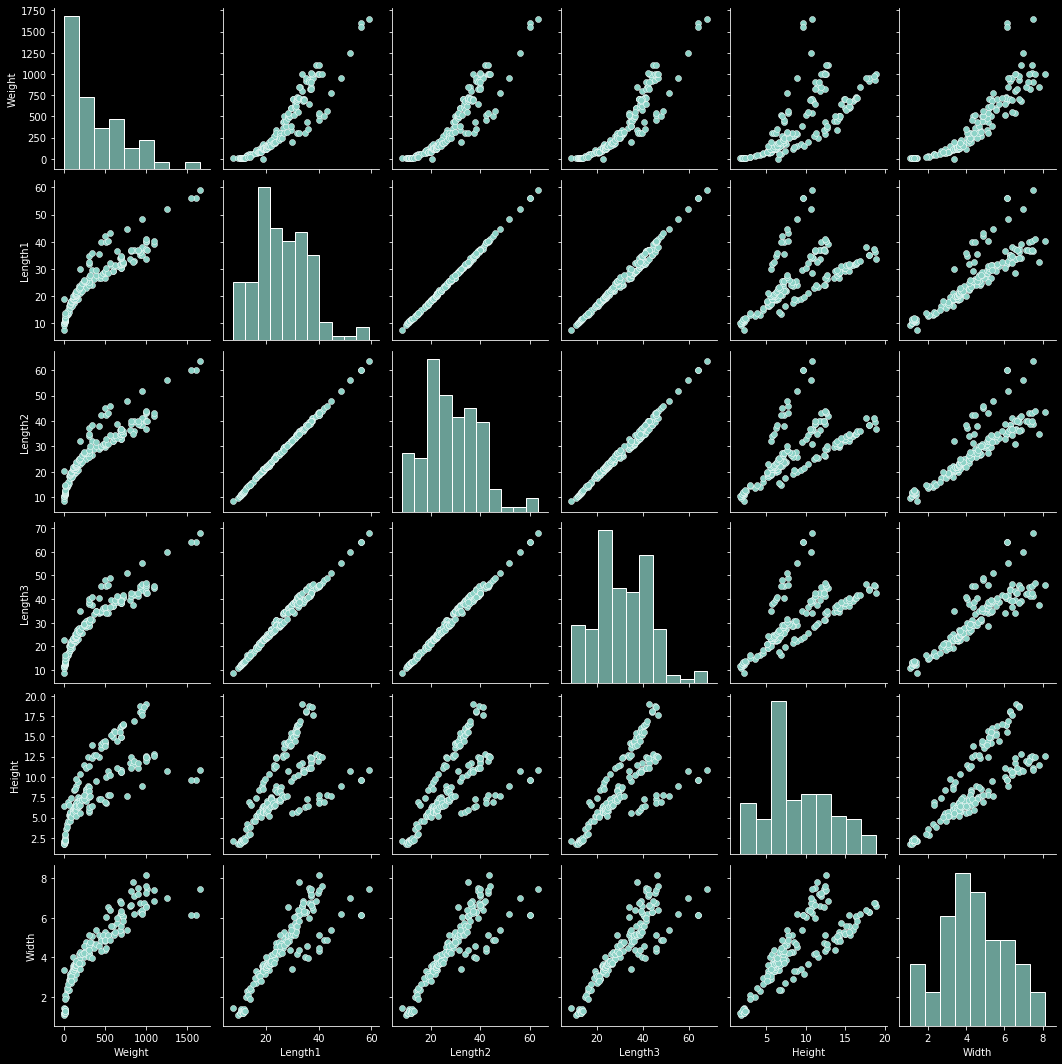

In [7]:
sns.pairplot(df)

## (3)

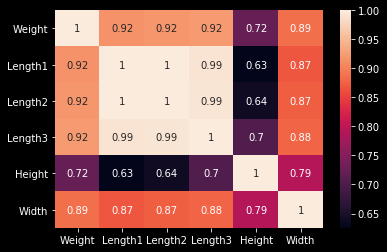

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### We can see the correlationship of the features,for example,the weight has high correlationship with length1,length2 and length2.

## (4)

### Length1,length2 and length has highly colinearity.And there are many species of fish,the interval of height and width for each fish is very large.

# Part 2: Multiple Linear Regression

## (1)

In [10]:
x = df_processed.iloc[:,1:]
y = df_processed.iloc[:,0]

In [11]:
import statsmodels.api as sm

model = sm.OLS(y, x).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           6.85e-82
Time:                        16:04:50   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Length1             -80.3030     36.27

## (2)

$R^2:0.936$,          $adj.R^2:0.931$

The model is significant,but not all coefficients significant.The coefficients of Length1\2\3,Height,Width are not significant.It meets with the former answer since multicolinearity may make significant coefficients not significant and unsignificant coefficients significant,which will make the model less bad.

# Part 3: Model Selection

In [12]:
from hw3_helper_function import *

## (1)

In [39]:
result = best_subset(y,x)

Loop...:   0%|          | 0/12 [00:00<?, ?it/s]

In [50]:
AICS = []
BICS = []
ADJR = []
for i in result["numb_features"].unique():
    AICS.append(min(result[result["numb_features"]==i]["AIC"]))
    BICS.append(min(result[result["numb_features"]==i]["BIC"]))
    ADJR.append(min(result[result["numb_features"]==i]["adj_R_squared"]))


## (2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


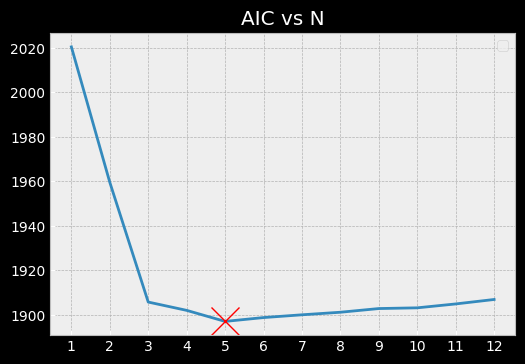

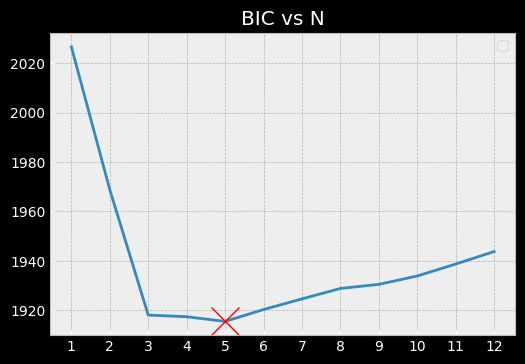

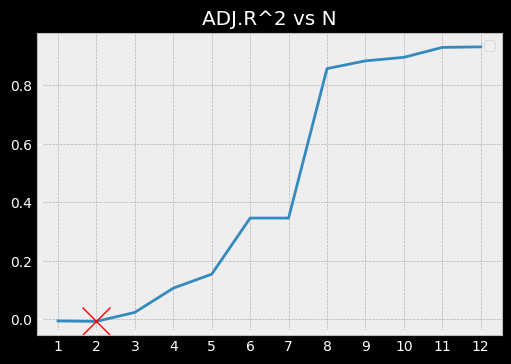

In [60]:
xa = np.unique(result["numb_features"])
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.figure()
plt.style.use("bmh")
plt.xticks(xa)
plt.title("AIC vs N")
plt.plot(xa,AICS)
plt.plot(AICS.index(min(AICS))+1,min(AICS),marker = 'x', markersize = 20, color='r')
plt.legend(loc='upper right')

xa = np.unique(result["numb_features"])
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100#分辨率
plt.figure()
plt.style.use("bmh")
plt.xticks(xa)
plt.title("BIC vs N")
plt.plot(xa,BICS)
plt.plot(BICS.index(min(BICS))+1,min(BICS),marker = 'x', markersize = 20, color='r')
plt.legend(loc='upper right')

xa = np.unique(result["numb_features"])
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
plt.figure()
plt.style.use("bmh")
plt.xticks(xa)
plt.title("ADJ.R^2 vs N")
plt.plot(xa,ADJR)
plt.plot(ADJR.index(min(ADJR))+1,min(ADJR),marker = 'x', markersize = 20, color='r')
plt.legend(loc='upper right')



In [ ]:
plot_selection(result2,['AIC','BIC','adj_R_squared'])


In [62]:
print("When the AIC or BIC is maximum,the model contains 12 variables:")
print("Features of AIC:",result[result['AIC']==min(AICS)]["features"])
print("Features of AIC:",result[result['BIC']==min(BICS)]["features"])




When the AIC or BIC is maximum,the model contains 12 variables:
Features of AIC: 898    (Length1, Length2, Species_Parkki, Species_Pike, Species_Smelt)
Name: features, dtype: object
Features of AIC: 898    (Length1, Length2, Species_Parkki, Species_Pike, Species_Smelt)
Name: features, dtype: object


## (3)

In [18]:
result2 = forward_stepwise(y,x,list(x.columns))

In [19]:
result2

,features,RSS,R_squared,AIC,BIC,adj_R_squared,numb_features
1,[Length3],2.996433e+06,0.852009,2020.423074,2026.560882,0.851067,1
2,"[Length3, Species_Pike]",2.171896e+06,0.892732,1971.253370,1980.460083,0.891357,2
3,"[Length3, Species_Pike, Species_Smelt]",1.559677e+06,0.922969,1920.604965,1932.880582,0.921478,3
4,"[Length3, Species_Pike, Species_Smelt, Length2]",1.399167e+06,0.930897,1905.337372,1920.681893,0.929102,4
5,"[Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki]",1.353918e+06,0.933131,1902.110233,1920.523658,0.930946,5
6,"[Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1]",1.310488e+06,0.935276,1898.926354,1920.408683,0.932722,6
7,"[Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1, Species_Bream]",1.303257e+06,0.935634,1900.046611,1924.597845,0.932650,7
8,"[Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1, Species_Bream, Species_...",1.296288e+06,0.935978,1901.194160,1928.814297,0.932563,8
9,"[Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1, Species_Bream, Species_...",1.294454e+06,0.936068,1902.969029,1933.658071,0.932207,9
10,"[Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1, Species_Bream, Species_...",1.294122e+06,0.936085,1904.928279,1938.686225,0.931766,10


## (4)

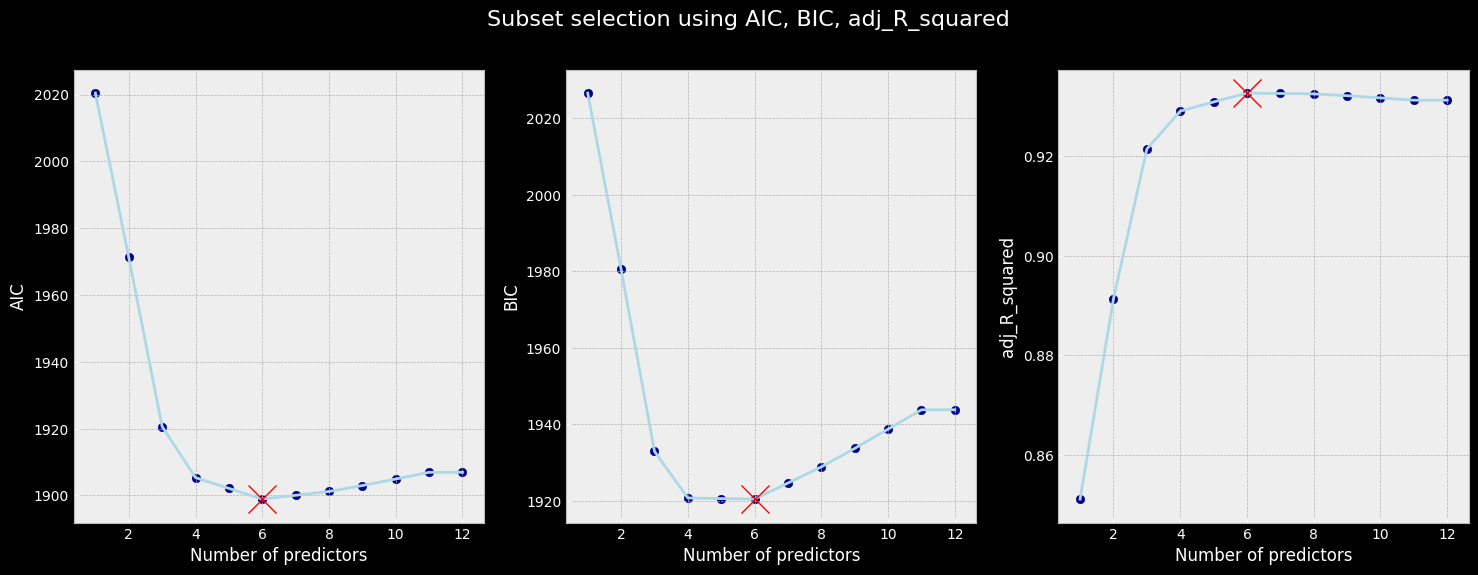

In [20]:
plot_selection(result2,['AIC','BIC','adj_R_squared'])



In [21]:
print("AIC:",result2.iloc[5,0])
print("BIC:",result2.iloc[3:6,0])

AIC: ['Length3', 'Species_Pike', 'Species_Smelt', 'Length2', 'Species_Parkki', 'Length1']
BIC: 4                             [Length3, Species_Pike, Species_Smelt, Length2]
5             [Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki]
6    [Length3, Species_Pike, Species_Smelt, Length2, Species_Parkki, Length1]
Name: features, dtype: object


## According to AIC,remaining 6 features in the model,and to BIC,remianing 4\5\6 is ok.

## (5)

In [22]:
def backward_stepwise(y, X, remaining_features):
    features = remaining_features.copy()
    RSS_list, R_squared_list, adj_R_squared_list, AIC_list, BIC_list = [],[],[],[],[] 
    features_list = dict()                                    # Intialize feature list using dictionary. This is one way
    k = len(remaining_features)
    for i in range(k,0,-1):
        best_RSS = np.inf                                    # initialize the best_RSS in each round to be infinity

        for combo in itertools.combinations(remaining_features,1): # iterate through all remaining features

            new_features = remaining_features.copy()
            new_features.remove(combo[0])
            X_c = sm.add_constant(X[new_features])  # we need to add constant term using sm.OLS
            model = sm.OLS(y, X_c).fit()

            if model.ssr < best_RSS:                          # compare the RSS value with the smallest value in this round
                best_RSS = model.ssr                          # update the best value
                best_R_squared = model.rsquared               # update best best_R_squared
                best_feature = combo[0]                       # the best feature in this round
                best_aic = model.aic
                best_bic = model.bic
                best_adj_R_squared = model.rsquared_adj

        #Updating variables for next loop
        features.remove(best_feature)                         # add the best feature in the features set
        remaining_features.remove(best_feature)               # remove it from candidate set

        #Saving values for plotting
        RSS_list.append(best_RSS)
        R_squared_list.append(best_R_squared)
        AIC_list.append(best_aic)
        BIC_list.append(best_bic)
        adj_R_squared_list.append(best_adj_R_squared)
        features_list[i] = features.copy()

    # store results in df_results, which is a joint of df_features and df_values
    df_features = pd.DataFrame({'features':features_list})
    df_values = pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list,'AIC':AIC_list,'BIC':BIC_list, 'adj_R_squared': adj_R_squared_list})
    df_values.index += 1  # shift the index by 1 to get aligned with df_features
    df_results = pd.concat([df_features,df_values], axis=1, join='inner')
    df_results['numb_features'] = df_results.index
    df_results["features"] = np.flip(df_results["features"].values)
    df_results["numb_features"] = np.flip(df_results["numb_features"].values)
    return df_results

In [23]:
result3 = backward_stepwise(y,x,list(x.columns))

In [24]:
result3

,features,RSS,R_squared,AIC,BIC,adj_R_squared,numb_features
1,"[Length1, Length2, Length3, Height, Width, Species_Bream, Species_Parkki, Species_Perch, Species...",1.294118e+06,0.936085,1906.927776,1943.754627,0.931302,12
2,"[Length1, Length2, Length3, Height, Species_Bream, Species_Parkki, Species_Perch, Species_Pike, ...",1.294122e+06,0.936085,1904.928279,1938.686225,0.931766,11
3,"[Length1, Length2, Length3, Species_Bream, Species_Parkki, Species_Perch, Species_Pike, Species_...",1.296149e+06,0.935985,1903.177050,1933.866092,0.932118,10
4,"[Length1, Length2, Species_Bream, Species_Parkki, Species_Perch, Species_Pike, Species_Roach, Sp...",1.309891e+06,0.935306,1902.853957,1930.474094,0.931856,9
5,"[Length2, Species_Bream, Species_Parkki, Species_Perch, Species_Pike, Species_Roach, Species_Whi...",1.356024e+06,0.933027,1906.357416,1930.908650,0.929923,8
6,"[Length2, Species_Bream, Species_Perch, Species_Pike, Species_Roach, Species_Whitefish]",1.574625e+06,0.922231,1928.121601,1949.603930,0.919161,7
7,"[Length2, Species_Bream, Species_Perch, Species_Pike, Species_Roach]",1.670322e+06,0.917505,1935.502436,1953.915861,0.914809,6
8,"[Length2, Species_Perch, Species_Pike, Species_Roach]",1.756769e+06,0.913235,1941.525580,1956.870101,0.910981,5
9,"[Length2, Species_Perch, Species_Pike]",1.929703e+06,0.904694,1954.454081,1966.729697,0.902849,4
10,"[Length2, Species_Pike]",2.028171e+06,0.899831,1960.367252,1969.573965,0.898547,3


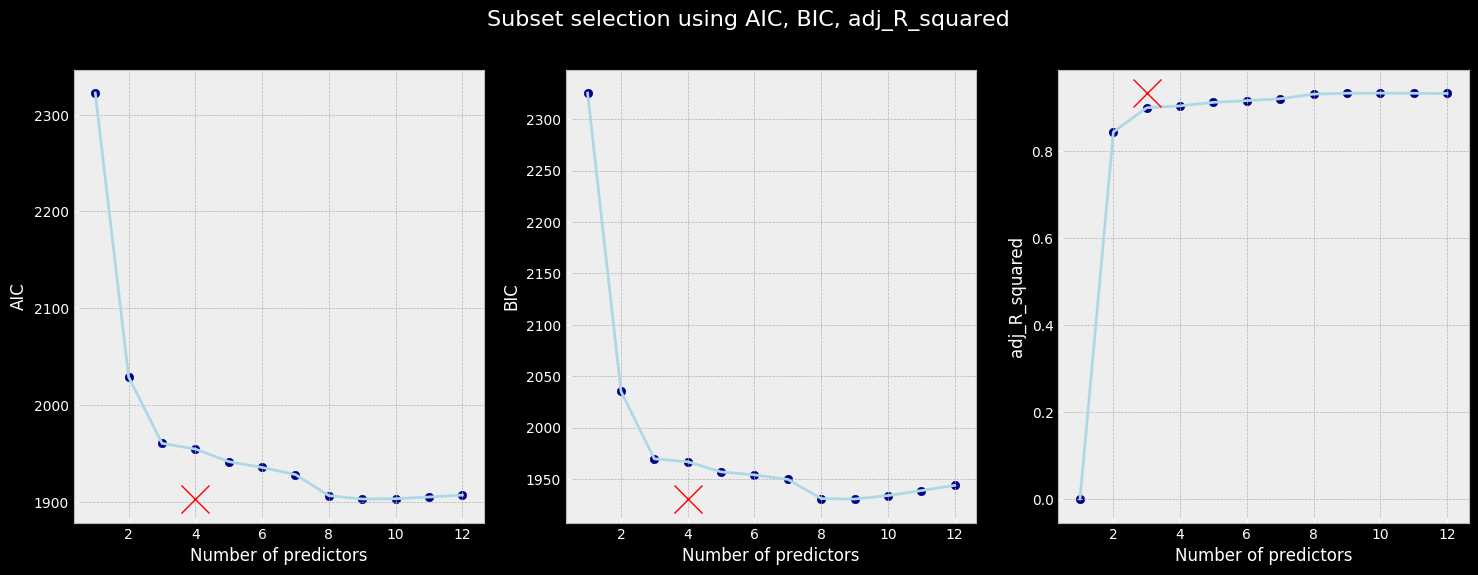

In [25]:
plot_selection(result3,['AIC','BIC','adj_R_squared'])

## (6)

In [26]:
print("AIC:",result3['features'][3])
print("BIC:",result3['features'][3])
print("Adj.R^2:",result3['features'][2])

AIC: ['Length1', 'Length2', 'Length3', 'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Whitefish']
BIC: ['Length1', 'Length2', 'Length3', 'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Whitefish']
Adj.R^2: ['Length1', 'Length2', 'Length3', 'Height', 'Species_Bream', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Whitefish']


## Part 4: Lasso and Ridge, and Cross-Validation

## (1)

In [27]:
df_processed

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,0,1,0


In [28]:
from sklearn import preprocessing
x1 = df_processed.iloc[:,1:6]
y = df_processed.iloc[:,0]
xc = np.hstack([preprocessing.scale(x1),df_processed.iloc[:,6:].values])
yc = preprocessing.scale(y)

## (2)

Lasso:$RSS+\lambda||w||_1$

sklearn-Lasso:$\frac{1}{2 n_{sample}}RSS+\alpha||w||$

$\alpha = \frac{\lambda}{2n_{sample}}$

In [29]:
from sklearn import linear_model

In [46]:
clf = linear_model.Lasso(alpha=5/xc.shape[0],fit_intercept=False)
clf.fit(xc,yc)

Lasso(alpha=0.031446540880503145, fit_intercept=False)

In [47]:
print("None zero coef:",sum(clf.coef_ != 0))

None zero coef: 5


## (3)

In [1]:
from sklearn.model_selection import GridSearchCV
model = linear_model.Lasso()
alphas = np.logspace(-10, 10, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(X, y)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

print(clf.best_params_)
alpha = clf.best_params_["alpha"]
print("best \lambda:",2*alpha*y.shape[0])


NameError: name 'linear_model' is not defined

## (4)

In [297]:
clf = linear_model.Ridge(alpha=10*(2*len(yc)),fit_intercept=False)
clf.fit(xc,yc)

Ridge(alpha=3180, fit_intercept=False)

In [298]:
print("None zero coef:",sum(clf.coef_ != 0))

None zero coef: 12


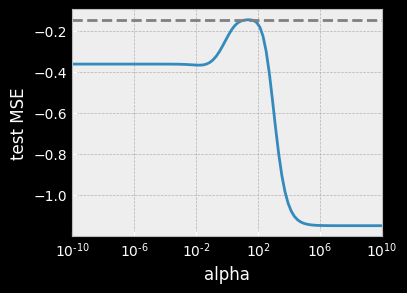

{'alpha': 20.565123083486515}


In [43]:
from sklearn.model_selection import GridSearchCV
model = linear_model.Ridge()
alphas = np.logspace(-10, 10, 100)

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clf = GridSearchCV(model, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_squared_error')
clf.fit(xc, yc)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.figure().set_size_inches(4, 3)
plt.semilogx(alphas, scores)
plt.ylabel('test MSE')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

print(clf.best_params_)


# Part 5: Final Note

Using $x^2$,or $e^x$ as independent variables to fit the model,as the pairplot shows that the relationship between $y$ and $x_i$ may not be linear.